# **car  price prediction**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder,StandardScaler,PowerTransformer, MinMaxScaler, RobustScaler
from sklearn.model_selection import KFold, cross_val_predict, train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR


from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.feature_selection import SelectKBest,SelectPercentile,f_classif,f_regression,mutual_info_regression,mutual_info_classif,SelectFromModel,RFE

from xgboost import XGBRegressor
from xgboost import plot_importance



#importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

import warnings
warnings.filterwarnings('ignore')


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving CarPrice_Assignment.csv to CarPrice_Assignment.csv


In [ ]:
import io
cars=pd.read_csv(io.BytesIO(uploaded['CarPrice_Assignment.csv']))

In [ ]:
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
 cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
cars.shape

(205, 26)

In [ ]:
cars.duplicated().sum()

0

In [ ]:
cars.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
cars.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [ ]:
# let us make the copy of the dataset
cars1= cars.copy()

In [ ]:
cars1['CarName'].sample(5)

181       toyouta tercel
191    volkswagen rabbit
4             audi 100ls
116          peugeot 504
200      volvo 145e (sw)
Name: CarName, dtype: object

In [ ]:
cars1['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

I'll use only the brands/make not the models.

I have seen several typos, I'll handle those

In [ ]:
cars1['model'] = [x.split()[0] for x in cars1['CarName']]
cars1['model'] = cars1['model'].replace({'maxda': 'Mazda','mazda': 'Mazda',
                                     'nissan': 'Nissan',
                                     'porcshce': 'Porsche','porsche':'Porsche',
                                     'toyouta': 'Toyota', 'toyota':'Toyota',
                            'vokswagen': 'Volkswagen', 'vw': 'Volkswagen', 'volkswagen':'Volkswagen'})

Let's drop the 'carname' and 'carid' columns

In [ ]:
cars1.drop(columns=['car_ID','CarName'], axis=1, inplace=True)

numerical and categorical columns

In [ ]:
numerical= cars1.drop(['price'], axis=1).select_dtypes('number').columns

categorical = cars1.select_dtypes('object').columns

print(f'Numerical Columns:  {cars1[numerical].columns}')
print('\n')
print(f'Categorical Columns: {cars1[categorical].columns}')

Numerical Columns:  Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')


Categorical Columns: Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem',
       'model'],
      dtype='object')


In [ ]:

cars1['price'].describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

In [ ]:

print( f"Skewness: {cars1['price'].skew()}")

Skewness: 1.7776781560914454


<Axes: xlabel='price', ylabel='Count'>

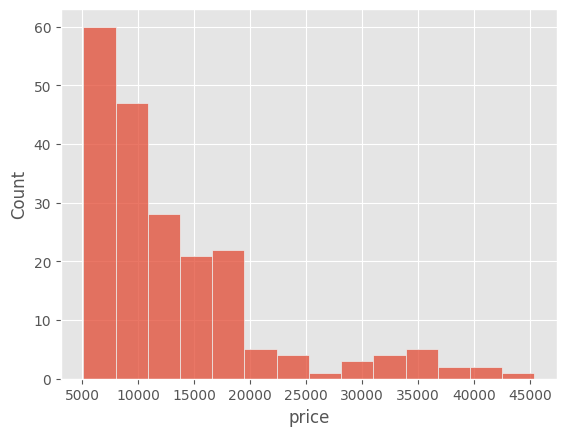

In [ ]:

sns.histplot(data=cars1, x='price')

# Numerical Features

In [ ]:

cars1[numerical].describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000


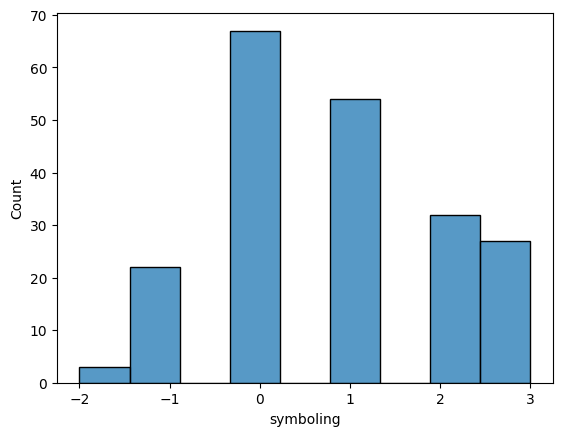

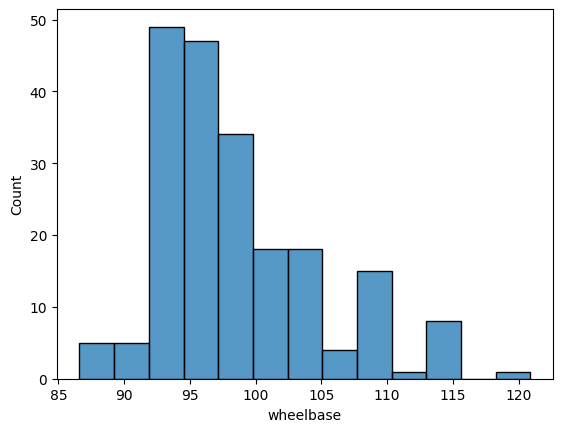

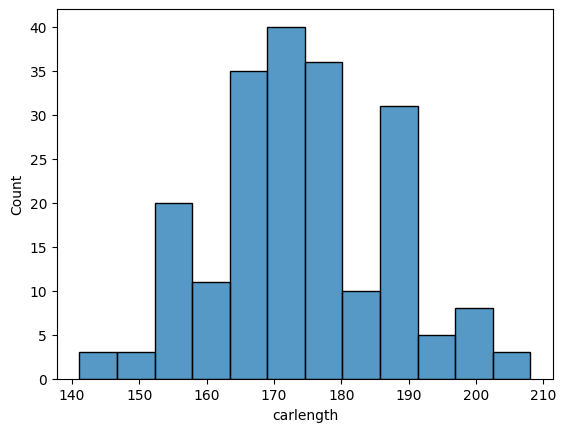

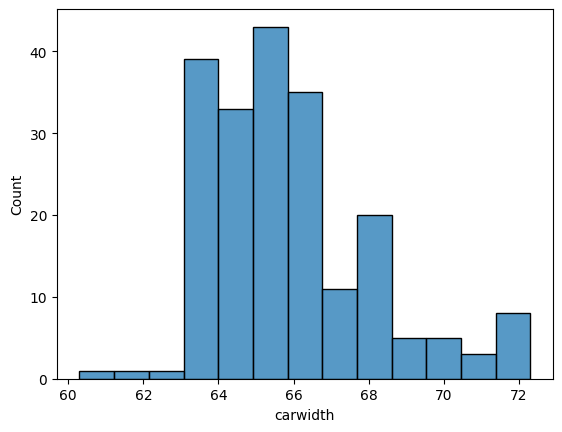

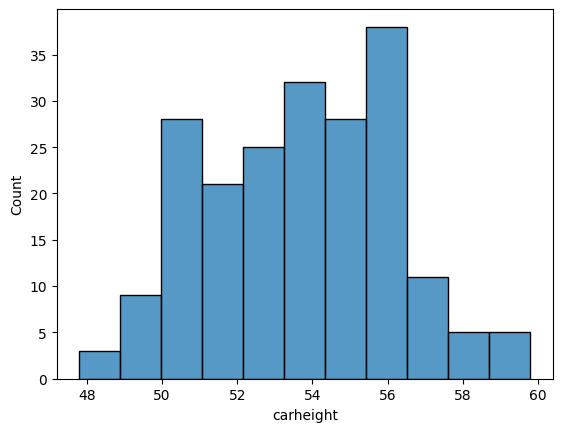

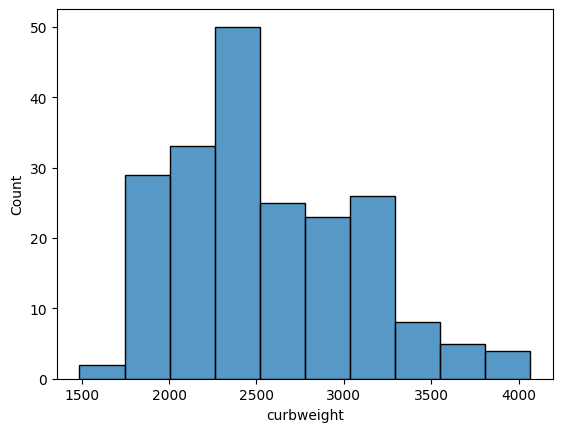

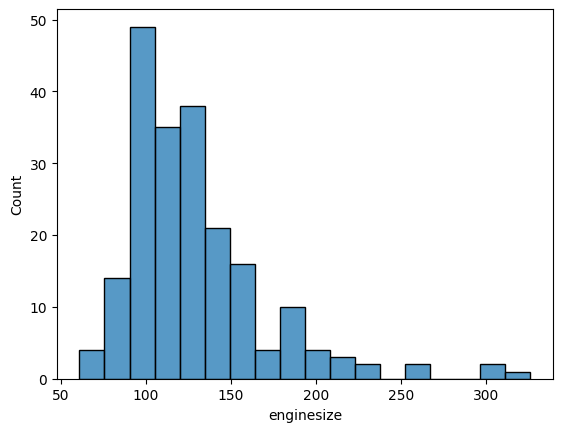

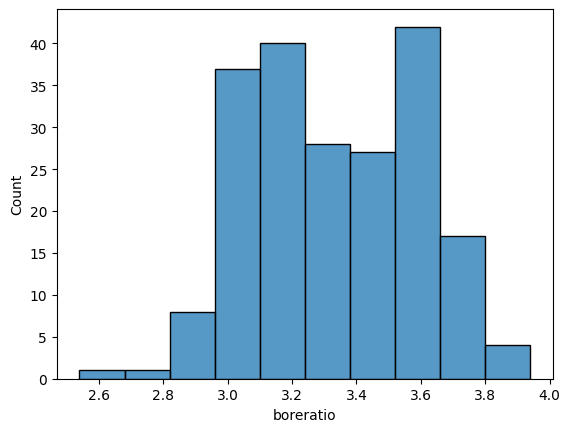

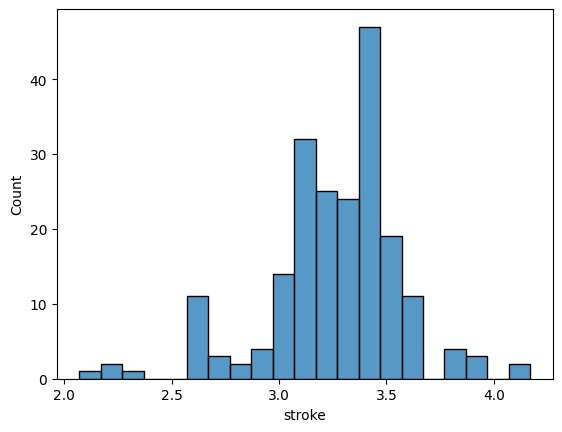

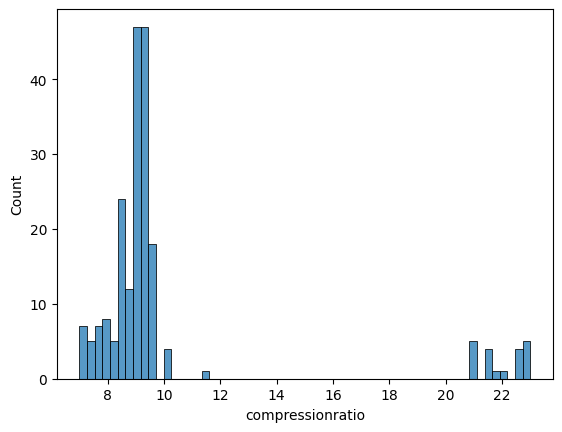

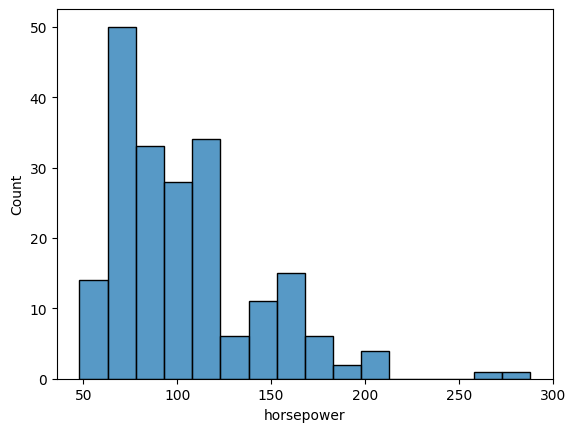

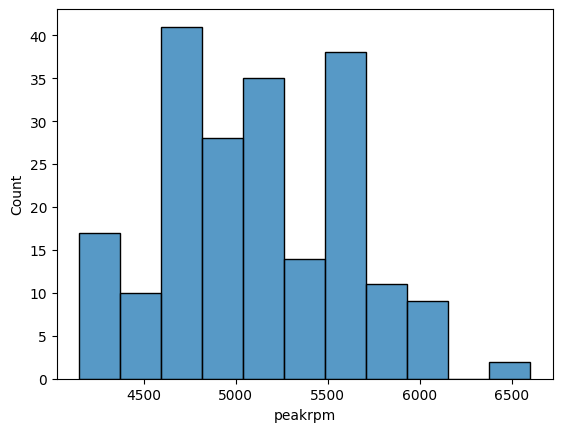

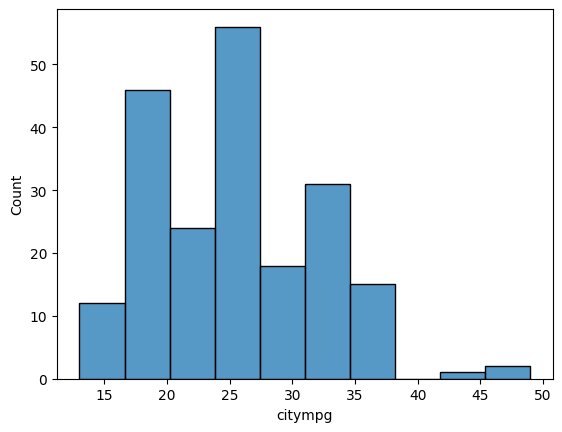

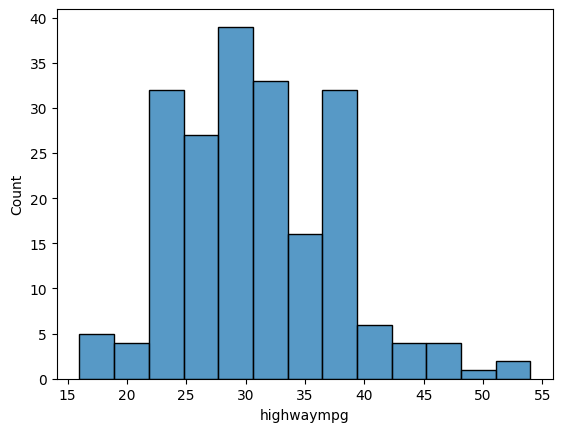

In [ ]:

for column in numerical:
    sns.histplot(data=cars1, x=column)
    plt.show()

In [ ]:
skew_limit = 0.75 # This is our threshold-limit to evaluate skewness. Overall below abs(1) seems acceptable for the linear models.
skew_vals = cars1[numerical].skew()
skew_cols= skew_vals[abs(skew_vals)> skew_limit].sort_values(ascending=False)
skew_cols

compressionratio    2.610862
enginesize          1.947655
horsepower          1.405310
wheelbase           1.050214
carwidth            0.904003
dtype: float64

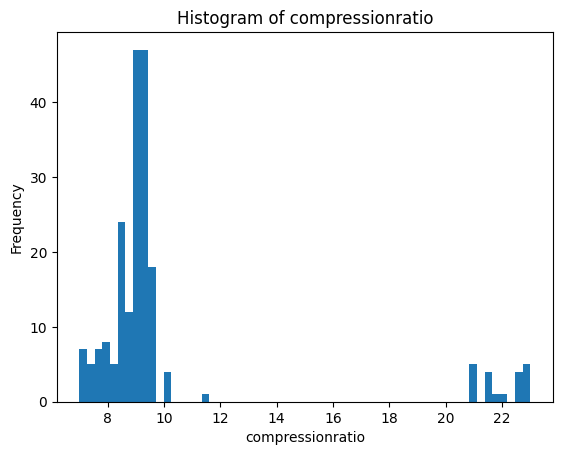

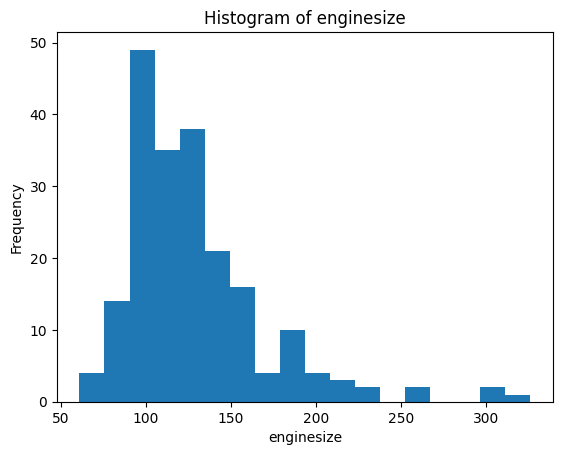

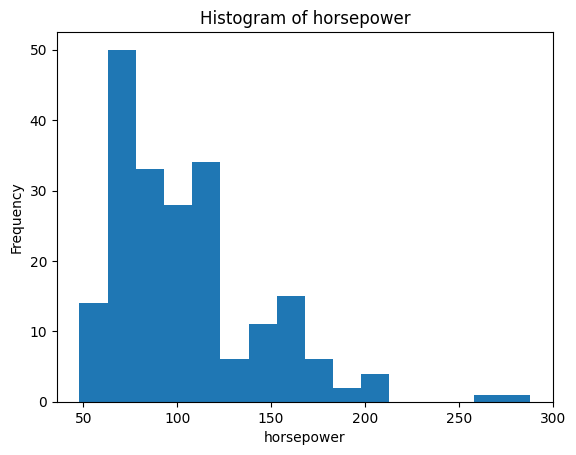

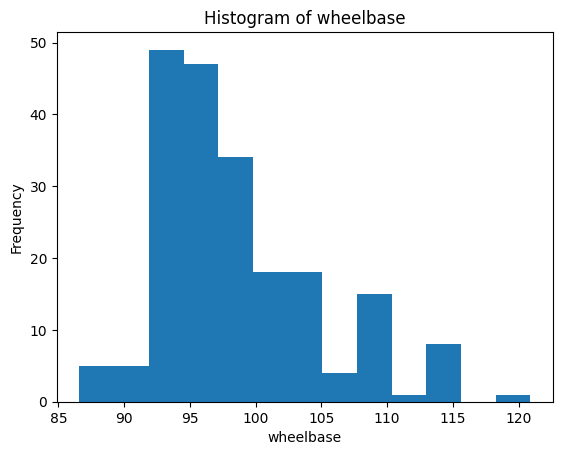

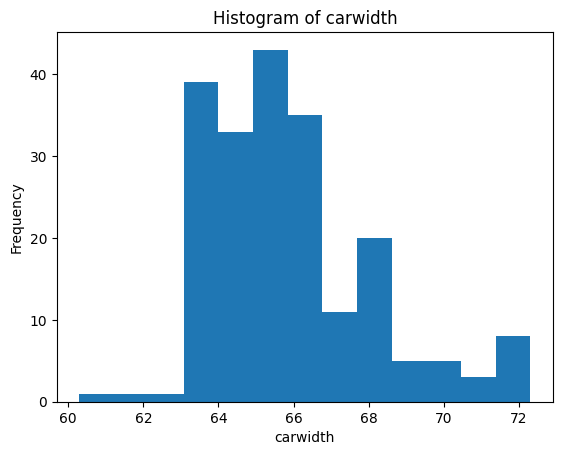

In [ ]:
for column in skew_cols.index:
    plt.hist(cars1[column], bins='auto')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show();


In [ ]:
df_try = cars1.copy()

for col in skew_cols.index.values:
    df_try[col] = df_try[col].apply(np.log1p)

print(df_try[skew_cols.index].skew())
print()

compressionratio    2.379056
enginesize          0.864706
horsepower          0.489938
wheelbase           0.885024
carwidth            0.815331
dtype: float64



<Axes: ylabel='Count'>

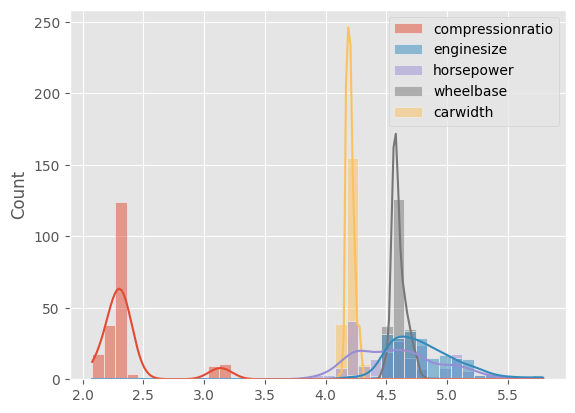

In [ ]:
sns.histplot(data=df_try[skew_cols.index], kde=True)

With Power Transformer

compressionratio    0.034222
enginesize         -0.002542
horsepower          0.049318
wheelbase          -0.003485
carwidth            0.000000
dtype: float64



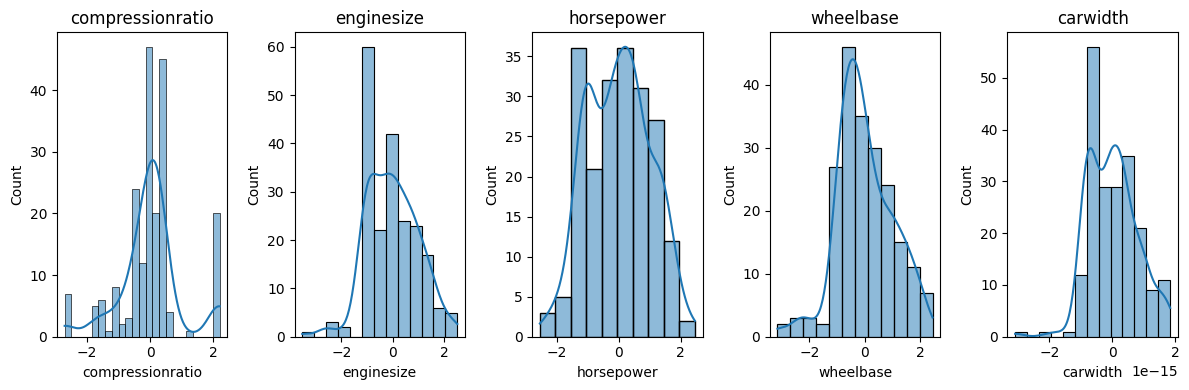

In [ ]:
df_trans = cars1[skew_cols.index].copy()
pt = PowerTransformer(method='yeo-johnson')
trans= pt.fit_transform(df_trans)
df_trans = pd.DataFrame(trans, columns =skew_cols.index )
print(df_trans.skew())
print()

fig, axes = plt.subplots(nrows=1, ncols=len(df_trans.columns), figsize=(12, 4))

# Iterate over columns and create histograms
for i, col in enumerate(df_trans.columns):
    sns.histplot(data=df_trans[col], kde=True, ax=axes[i])
    axes[i].set_title(col)

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

Categorical features

In [ ]:
cars1[categorical].head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,model
0,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
2,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero
3,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi
4,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi


Fuel Type & Price

In [ ]:
fueltc= cars1.groupby('fueltype')['price'].mean()
pd.DataFrame(fueltc)

,price
fueltype,
diesel,15838.1500
gas,12999.7982


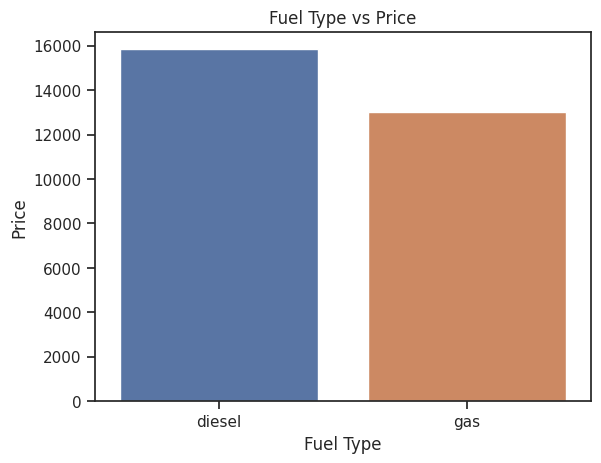

In [ ]:
# Assuming fueltype and price are lists
fueltype = ['diesel', 'gas']
price = [15838.1500, 12999.7982]

# Create a dictionary to map fueltype to price
data = {'FuelType': fueltype, 'Price': price}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Set the plot style
sns.set(style='ticks')

# Create the bar plot
sns.barplot(data=df, x='FuelType', y='Price')

# Set the x-axis label
plt.xlabel('Fuel Type')

# Set the y-axis label
plt.ylabel('Price')

# Set the plot title
plt.title('Fuel Type vs Price')

# Display the plot
plt.show()







Aspiration and price

In [ ]:
aspirationc= cars1.groupby('aspiration')['price'].mean()
pd.DataFrame(aspirationc)

,price
aspiration,
std,12611.270833
turbo,16298.166676


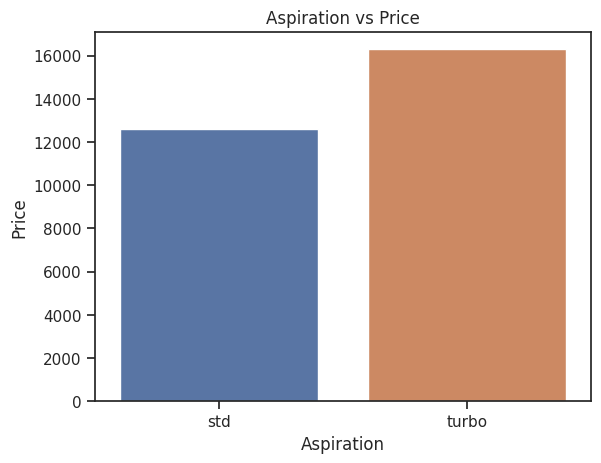

In [ ]:
# Assuming fueltype and price are lists
aspiration = ['std', 'turbo']
price = [12611.270833, 16298.166676]
# Create a dictionary to map fueltype to price
data = {'Aspiration': aspiration, 'Price': price}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Set the plot style
sns.set(style='ticks')

# Create the bar plot
sns.barplot(data=df, x='Aspiration', y='Price')

# Set the x-axis label
plt.xlabel('Aspiration')

# Set the y-axis label
plt.ylabel('Price')

# Set the plot title
plt.title('Aspiration vs Price')

# Display the plot
plt.show()







carbody and price

In [ ]:
cars1.groupby('carbody')['price'].mean()

carbody
convertible    21890.500000
hardtop        22208.500000
hatchback      10376.652386
sedan          14344.270833
wagon          12371.960000
Name: price, dtype: float64

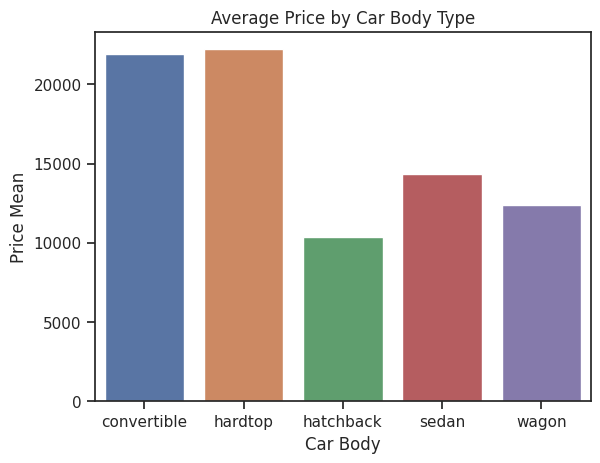

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Input data
carbody = ['convertible', 'hardtop', 'hatchback', 'sedan', 'wagon']
price_mean = [21890.500000, 22208.500000, 10376.652386, 14344.270833, 12371.960000]

# Create a DataFrame to hold the data
data = {'Carbody': carbody, 'Price Mean': price_mean}
df = pd.DataFrame(data)

# Set the plot style
sns.set(style='ticks')

# Create the bar plot
sns.barplot(data=df, x='Carbody', y='Price Mean')

# Set the plot title and labels
plt.title('Average Price by Car Body Type')
plt.xlabel('Car Body')
plt.ylabel('Price Mean')

# Show the plot
plt.show()


drive wheel and price

In [ ]:
cars1.groupby('drivewheel')['price'].mean()

drivewheel
4wd    11087.463000
fwd     9239.308333
rwd    19910.809211
Name: price, dtype: float64

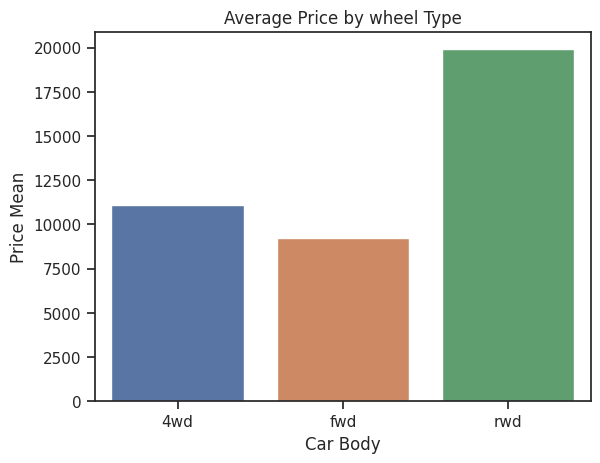

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Input data
drivewheel = ['4wd', 'fwd', 'rwd']
price_mean = [11087.463000, 9239.308333, 19910.809211]

# Create a DataFrame to hold the data
data = {'Drivewheel': drivewheel, 'Price Mean': price_mean}
df = pd.DataFrame(data)

# Set the plot style
sns.set(style='ticks')

# Create the bar plot
sns.barplot(data=df, x='Drivewheel', y='Price Mean')

# Set the plot title and labels
plt.title('Average Price by wheel Type')
plt.xlabel('Car Body')
plt.ylabel('Price Mean')

# Show the plot
plt.show()


Engine location & Price

In [ ]:
cars1.groupby('enginelocation')['price'].mean()

enginelocation
front    12961.097361
rear     34528.000000
Name: price, dtype: float64

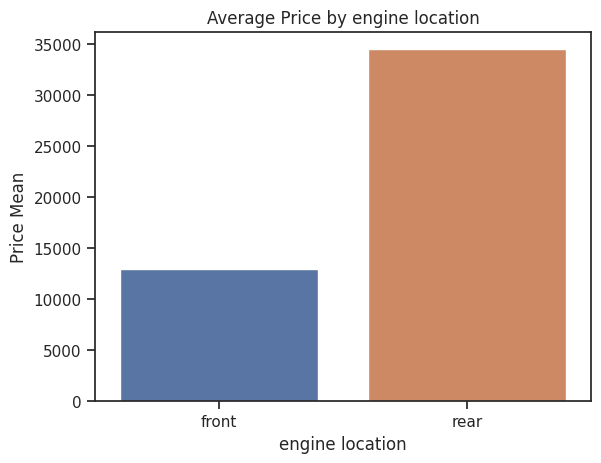

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Input data
enginelocation = ['front', 'rear']
price_mean = [12961.097361, 34528.000000]

# Create a DataFrame to hold the data
data = {'Enginelocation': enginelocation, 'Price Mean': price_mean}
df = pd.DataFrame(data)

# Set the plot style
sns.set(style='ticks')

# Create the bar plot
sns.barplot(data=df, x='Enginelocation', y='Price Mean')

# Set the plot title and labels
plt.title('Average Price by engine location')
plt.xlabel('engine location')
plt.ylabel('Price Mean')

# Show the plot
plt.show()


Engine type and price

In [ ]:
cars1.groupby('enginetype')['price'].mean().sort_values()

enginetype
ohc      11574.048426
rotor    13020.000000
ohcf     13738.600000
l        14627.583333
dohc     18116.416667
ohcv     25098.384615
dohcv    31400.500000
Name: price, dtype: float64

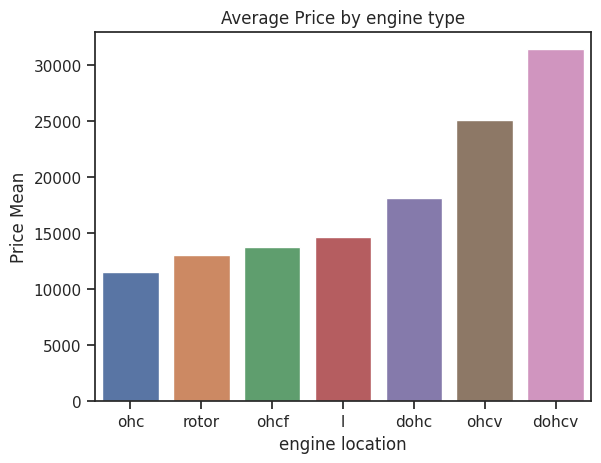

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Input data
enginetype = ['ohc', 'rotor','ohcf','l','dohc','ohcv','dohcv']
price_mean = [11574.048426, 13020.000000,13738.600000,14627.583333,18116.416667,25098.384615,31400.500000]

# Create a DataFrame to hold the data
data = {'Enginetype': enginetype, 'Price Mean': price_mean}
df = pd.DataFrame(data)

# Set the plot style
sns.set(style='ticks')

# Create the bar plot
sns.barplot(data=df, x='Enginetype', y='Price Mean')

# Set the plot title and labels
plt.title('Average Price by engine type')
plt.xlabel('engine location')
plt.ylabel('Price Mean')

# Show the plot
plt.show()


fuel system and price

In [ ]:
cars1.groupby('fuelsystem')['price'].mean().sort_values()

fuelsystem
2bbl     7478.151515
1bbl     7555.545455
spdi    10990.444444
spfi    11048.000000
4bbl    12145.000000
mfi     12964.000000
idi     15838.150000
mpfi    17754.602840
Name: price, dtype: float64

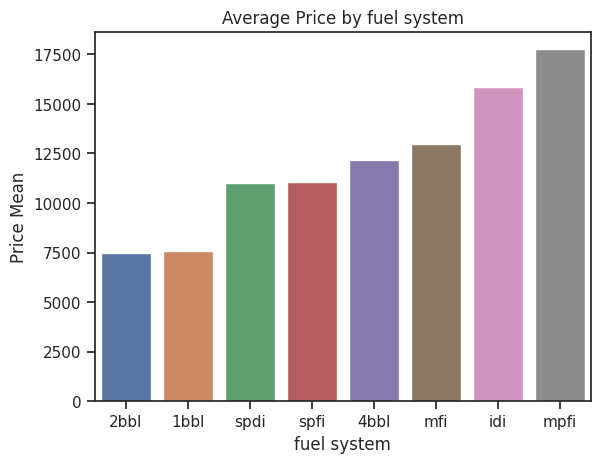

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Input data
fuelsystem= ['2bbl', '1bbl','spdi','spfi','4bbl','mfi','idi','mpfi']
price_mean = [7478.151515, 7555.545455,10990.444444,11048.000000,12145.000000,12964.000000,15838.150000,17754.602840]

# Create a DataFrame to hold the data
data = {'Fuelsystem': fuelsystem, 'Price Mean': price_mean}
df = pd.DataFrame(data)

# Set the plot style
sns.set(style='ticks')

# Create the bar plot
sns.barplot(data=df, x='Fuelsystem', y='Price Mean')

# Set the plot title and labels
plt.title('Average Price by fuel system')
plt.xlabel('fuel system')
plt.ylabel('Price Mean')

# Show the plot
plt.show()


model and price

In [ ]:
cars1.groupby('model')['price'].mean().sort_values()

model
chevrolet       6007.000000
dodge           7875.444444
plymouth        7963.428571
honda           8184.692308
subaru          8541.250000
isuzu           8916.500000
mitsubishi      9239.769231
renault         9595.000000
Toyota          9885.812500
Volkswagen     10077.500000
Nissan         10415.666667
Mazda          10652.882353
saab           15223.333333
peugeot        15489.090909
alfa-romero    15498.333333
mercury        16503.000000
audi           17859.166714
volvo          18063.181818
bmw            26118.750000
Porsche        31400.500000
buick          33647.000000
jaguar         34600.000000
Name: price, dtype: float64

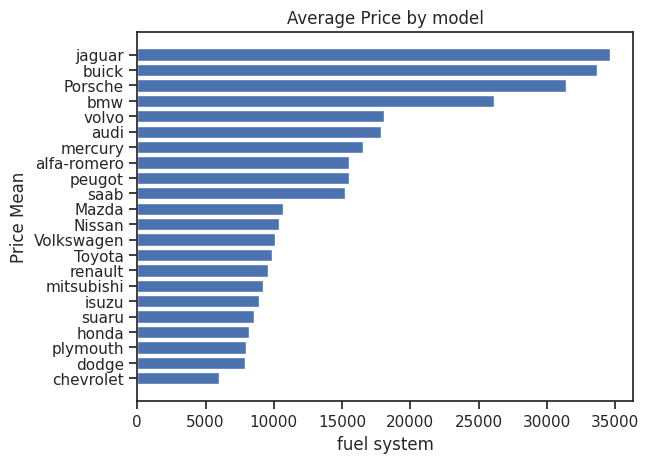

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Input data
model= ['chevrolet', 'dodge','plymouth','honda','suaru','isuzu','mitsubishi','renault','Toyota','Volkswagen','Nissan','Mazda','saab','peugot','alfa-romero','mercury','audi','volvo','bmw','Porsche','buick','jaguar']
price_mean = [6007.000000, 7875.444444,7963.428571,8184.692308,8541.250000,8916.500000,9239.769231,9595.000000,9885.812500,10077.500000,10415.666667,10652.882353,15223.333333,15489.090909,15498.333333,16503.000000,17859.166714,18063.181818,26118.750000,31400.500000, 33647.000000, 34600.000000]

# Create a DataFrame to hold the data
data = {'Model': model, 'Price Mean': price_mean}
df = pd.DataFrame(data)

# Set the plot style
sns.set(style='ticks')

# Create the bar plot
plt.barh(y='Model',width='Price Mean', data=df)

# Set the plot title and labels
plt.title('Average Price by model')
plt.xlabel('fuel system')
plt.ylabel('Price Mean')

# Show the plot
plt.show()


# Modelling
lets get the dummies

In [ ]:
cars2 = pd.get_dummies(cars1, columns=categorical, drop_first=True)
cars2.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,model_isuzu,model_jaguar,model_mercury,model_mitsubishi,model_peugeot,model_plymouth,model_renault,model_saab,model_subaru,model_volvo
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,0,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,0,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,0,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,0,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,0,0,0


linear regression

In [ ]:
X= cars2.drop('price', axis=1)
y= cars2['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()


model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print (f'model : {model} and  rmse score is : {np.sqrt(mean_squared_error(y_test, y_pred))}, r2 score is {r2_score(y_test, y_pred)}')

model : LinearRegression() and  rmse score is : 2667.099977476864, r2 score is 0.8973300701768978


Ridge & Lasso & Elasticnet & KNN with Scaler and Transformer

In [ ]:
rmse_test =[]
r2_test =[]
model_names =[]

numerical2= cars2.drop(['price'], axis=1).select_dtypes('number').columns

X= cars2.drop('price', axis=1)
y= cars2['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

s = StandardScaler()
p= PowerTransformer(method='yeo-johnson', standardize=True)

rr = Ridge()
las = Lasso()
el= ElasticNet()
knn = KNeighborsRegressor()

models = [rr,las,el,knn]

for model in models:
    ct = make_column_transformer((s,numerical2),(p,skew_cols.index),remainder='passthrough')
    pipe = make_pipeline(ct, model)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    rmse_test.append(round(np.sqrt(mean_squared_error(y_test, y_pred)),2))
    r2_test.append(round(r2_score(y_test, y_pred),2))
    print (f'model : {model} and  rmse score is : {round(np.sqrt(mean_squared_error(y_test, y_pred)),2)}, r2 score is {round(r2_score(y_test, y_pred),2)}')
    model_names = ['Ridge','Lasso','ElasticNet','KNeighbors']
result_df = pd.DataFrame({'RMSE':rmse_test,'R2_Test':r2_test}, index=model_names)
result_df

model : Ridge() and  rmse score is : 2424.32, r2 score is 0.92
model : Lasso() and  rmse score is : 2316.01, r2 score is 0.92
model : ElasticNet() and  rmse score is : 3377.36, r2 score is 0.84
model : KNeighborsRegressor() and  rmse score is : 3962.46, r2 score is 0.77


,RMSE,R2_Test
Ridge,2424.32,0.92
Lasso,2316.01,0.92
ElasticNet,3377.36,0.84
KNeighbors,3962.46,0.77


Random Forest& Gradient Boosting & Extra Trees & XGBoost

In [ ]:
rmse_test =[]
r2_test =[]
model_names =[]



X= cars2.drop('price', axis=1)
y= cars2['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)
et= ExtraTreesRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)

models = [rf,gb,et,xgb]
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse_test.append(round(np.sqrt(mean_squared_error(y_test, y_pred)),2))
    r2_test.append(round(r2_score(y_test, y_pred),2))
    print (f'model : {model} and  rmse score is : {round(np.sqrt(mean_squared_error(y_test, y_pred)),2)}, r2 score is {round(r2_score(y_test, y_pred),4)}')

model_names = ['RandomForest','GradientBoost','ExtraTree','XGB']
result_df = pd.DataFrame({'RMSE':rmse_test,'R2_Test':r2_test}, index=model_names)
result_df

model : RandomForestRegressor(random_state=42) and  rmse score is : 1985.33, r2 score is 0.9431
model : GradientBoostingRegressor(random_state=42) and  rmse score is : 2399.93, r2 score is 0.9169
model : ExtraTreesRegressor(random_state=42) and  rmse score is : 2508.94, r2 score is 0.9091
model : XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             p

,RMSE,R2_Test
RandomForest,1985.33,0.94
GradientBoost,2399.93,0.92
ExtraTree,2508.94,0.91
XGB,2579.57,0.90


Best Model with the Hyperparameter Tuning

In [ ]:
X= cars2.drop('price', axis=1)
y= cars2['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestRegressor(n_estimators= 220, random_state=42 )

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print (f' rmse score is : {round(np.sqrt(mean_squared_error(y_test, y_pred)),4)}, r2 score is {round(r2_score(y_test, y_pred),4)}')

 rmse score is : 1995.1555, r2 score is 0.9425


Feature Importance

symboling : 0.001
wheelbase : 0.008
carlength : 0.013
carwidth : 0.019
carheight : 0.003
curbweight : 0.16
enginesize : 0.601
boreratio : 0.005
stroke : 0.003
compressionratio : 0.004
horsepower : 0.027
peakrpm : 0.005
citympg : 0.01
highwaympg : 0.12
carbody_hardtop : 0.002
carbody_sedan : 0.001
drivewheel_rwd : 0.001
enginetype_ohc : 0.001
model_bmw : 0.006



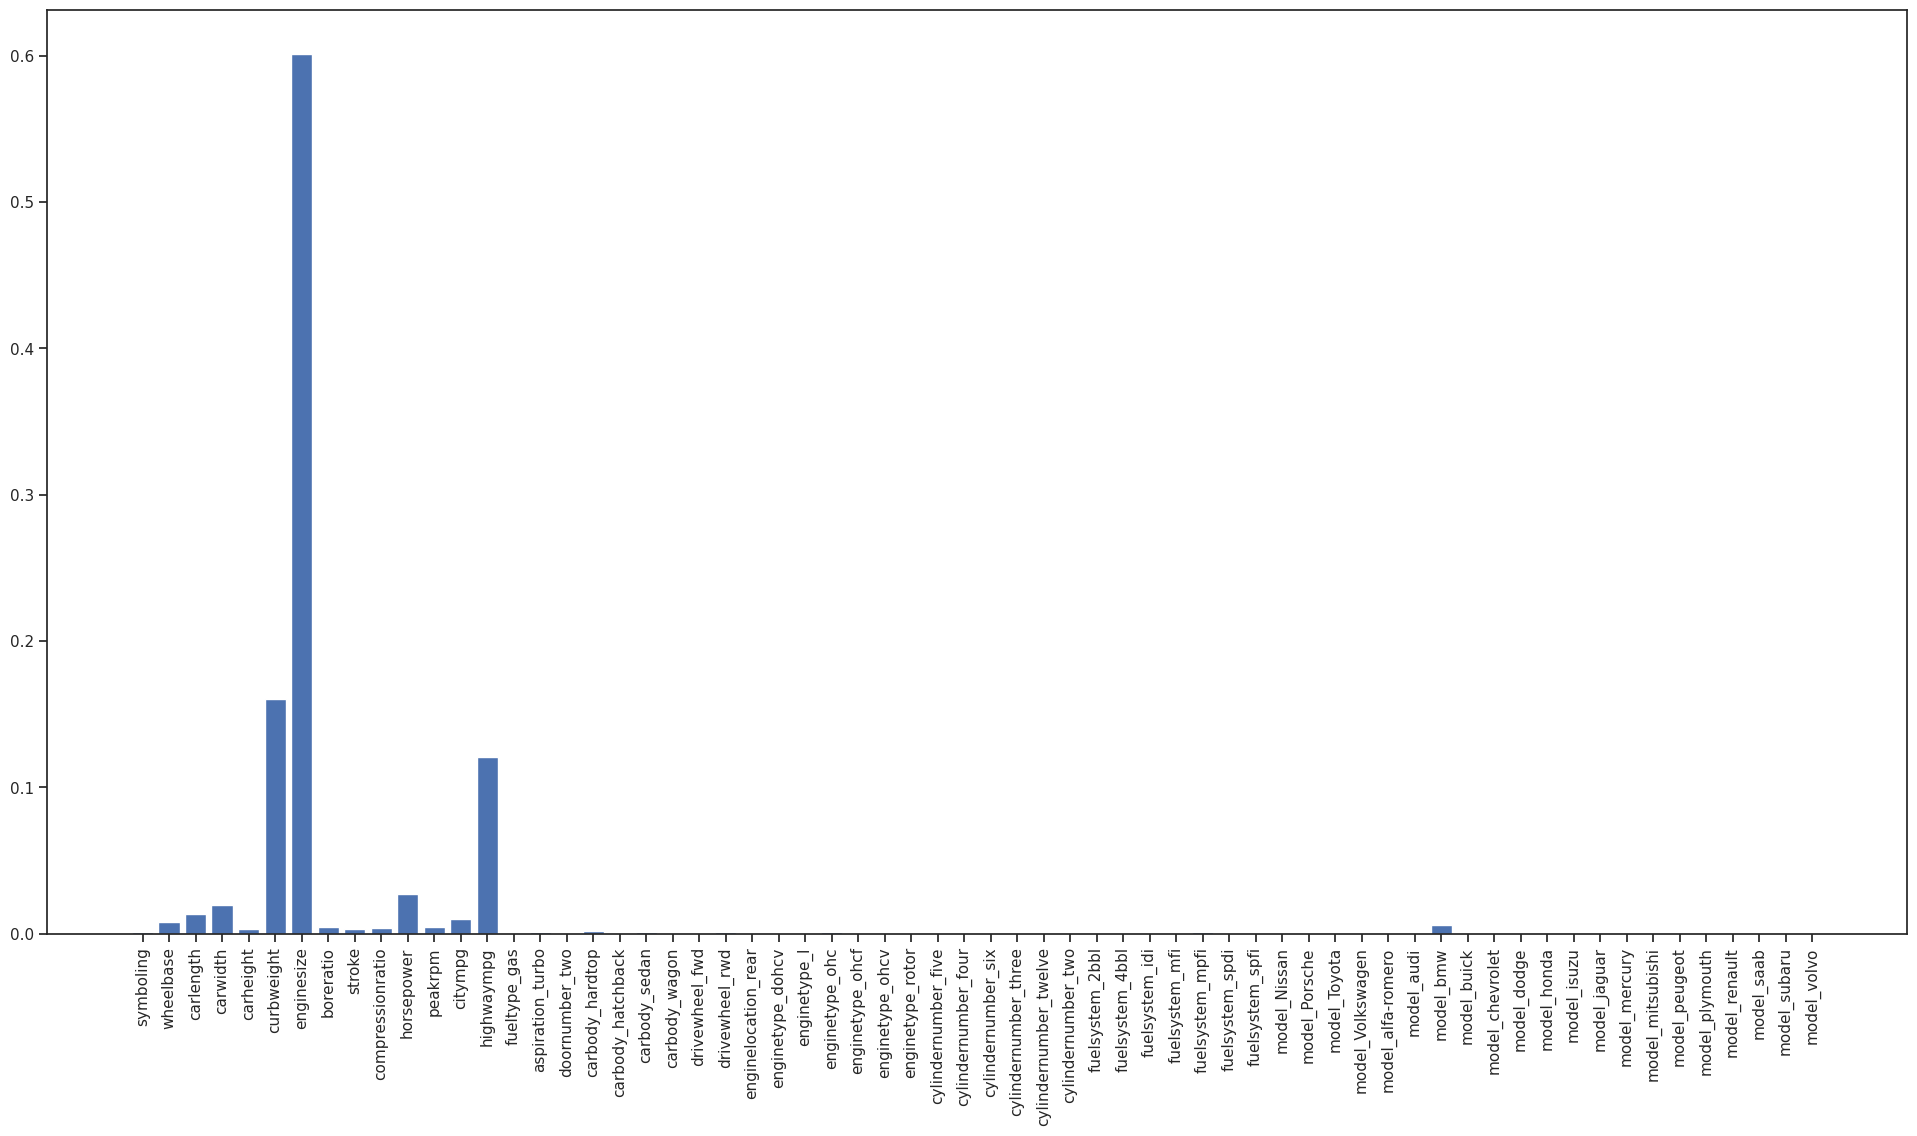

In [ ]:
importances = rf.feature_importances_
feature_names = [f'feature {i}' for i in range(X.shape[1])]

# what are scores for the features
for i in range(len(rf.feature_importances_)):
    if rf.feature_importances_[i] >0.001:
        print(f'{X_train.columns[i]} : {round(rf.feature_importances_[i],3)}')

print()

plt.bar([X_train.columns[i] for i in range(len(rf.feature_importances_))], rf.feature_importances_)
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (24,15)
plt.show()